In [1]:
from google.colab import drive
drive.mount('/drive')
!pip install ydata-profiling


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

In [3]:
rw = pd.read_csv("/drive/My Drive/Fall24/IS733/Homeworks/red_wine.csv")
ww = pd.read_csv("/drive/My Drive/Fall24/IS733/Homeworks/white_wine.csv")

In [21]:
profile = ProfileReport(rw, title="Profiling Report")
profile.to_file(output_file="/drive/My Drive/Fall24/IS733/Homeworks/red_wine_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
rw.head()

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=None)

In [7]:
X = rw.drop('type', axis=1)
y = rw['type']
y = LabelEncoder().fit_transform(y)

In [8]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.predict(X)
baseline_accuracy = dummy_clf.score(X, y)
prob_roc = dummy_clf.predict_proba(X)[:,1]
fpr, tpr, thresholds = roc_curve(y, prob_roc)
roc_auc = auc(fpr, tpr)
print(f"Baseline accuracy: {baseline_accuracy * 100:.2f}%")
print(f"AUC scores: {roc_auc}")

Baseline accuracy: 52.89%
AUC scores: 0.5


In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=kf,scoring='accuracy')
auc_scores = cross_val_score(lr, X, y, cv=kf,scoring='roc_auc')
print(f"Mean cross-validation score: {scores.mean() * 100:.2f}%")
print(f"AUC scores: {auc_scores.mean()}")

Mean cross-validation score: 77.94%
AUC scores: 0.8738792272640529


In [10]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
scores = cross_val_score(nb, X, y, cv=kf,scoring='accuracy')
auc_scores = cross_val_score(nb, X, y, cv=kf,scoring='roc_auc')
print(f"Mean cross-validation score: {scores.mean() * 100:.2f}%")
print(f"AUC scores: {auc_scores.mean()}")

Mean cross-validation score: 56.71%
AUC scores: 0.8492201536200887


In [19]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
scores = cross_val_score(nb, X, y, cv=kf,scoring='accuracy')
auc_scores = cross_val_score(nb, X, y, cv=kf,scoring='roc_auc')
print(f"Mean cross-validation score: {scores.mean() * 100:.2f}%")
print(f"AUC scores: {auc_scores.mean()}")

Mean cross-validation score: 82.15%
AUC scores: 0.8954626514494424


In [11]:
from sklearn.tree import DecisionTreeClassifier

dtc_cv = DecisionTreeClassifier(criterion='entropy', random_state = 42)
scores = cross_val_score(dtc_cv, X, y, cv=kf,scoring='accuracy')
auc_scores = cross_val_score(dtc_cv, X, y, cv=kf,scoring='roc_auc')
print(f"Mean cross-validation score: {scores.mean() * 100:.2f}%")
print(f"AUC scores: {auc_scores.mean()}")

Mean cross-validation score: 79.33%
AUC scores: 0.7845538275826095


In [12]:
from sklearn.svm import SVC

linear_svm = SVC(kernel='linear')

scores = cross_val_score(linear_svm, X, y, cv=kf,scoring='accuracy')
auc_scores = cross_val_score(linear_svm, X, y, cv=kf,scoring='roc_auc')
print(f"Mean cross-validation score: {scores.mean() * 100:.2f}%")
print(f"AUC scores: {auc_scores.mean()}")

Mean cross-validation score: 78.99%
AUC scores: 0.8750052088391447


In [13]:
radial_svm = SVC(kernel='rbf')

scores = cross_val_score(radial_svm, X, y, cv=kf,scoring='accuracy')
auc_scores = cross_val_score(radial_svm, X, y, cv=kf,scoring='roc_auc')
print(f"Mean cross-validation score: {scores.mean() * 100:.2f}%")
print(f"AUC scores: {auc_scores.mean()}")

Mean cross-validation score: 54.26%
AUC scores: 0.856975131513044


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X, y, cv=kf,scoring='accuracy')
auc_scores = cross_val_score(rf, X, y, cv=kf,scoring='roc_auc')
print(f"Mean cross-validation score: {scores.mean() * 100:.2f}%")
print(f"AUC scores: {auc_scores.mean()}")

Mean cross-validation score: 83.89%
AUC scores: 0.927229641276661


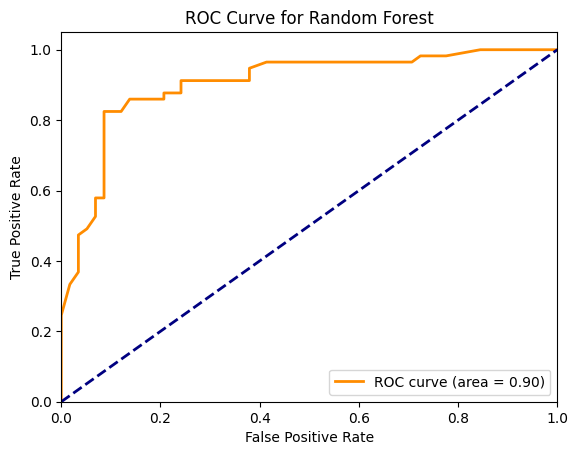

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)
prob_roc = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prob_roc)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [16]:
ww.head()

,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,low
1,0.49,0.56,9.4,low
2,0.66,0.73,10.0,low
3,0.32,0.77,10.0,low
4,0.38,0.82,10.0,low


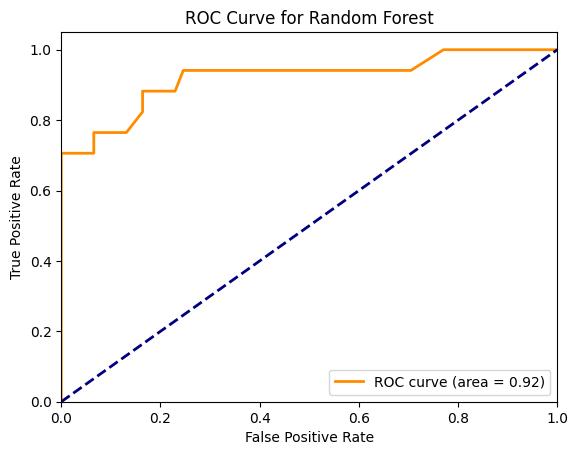

In [17]:
X_ww = ww.drop('type', axis=1)
y_ww = ww['type']
y_ww = LabelEncoder().fit_transform(y_ww)
prob_roc = rf.predict_proba(X_ww)[:,1]
fpr, tpr, thresholds = roc_curve(y_ww, prob_roc)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [18]:
print(roc_auc)

0.9204435872709739
